In [27]:
# standard libs
import os
import sys
import logging

# project lib
PROJECT_SRC_PATH = os.path.join(os.path.abspath(''), '..', 'src')
sys.path.append(PROJECT_SRC_PATH)

import utils
import dataset
import visualizations
from prediction_age import AgePredictor
from preprocessing import *

# external libs
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import geopandas as gpd
from shapely import wkt

import shap

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, AdaBoostClassifier
from xgboost import XGBRegressor, XGBClassifier, XGBRFClassifier

In [6]:
logging.basicConfig(format='%(asctime)s | %(levelname)s : %(message)s', level=logging.INFO)

In [3]:
%load_ext autoreload
%autoreload 2

## Data

In [ ]:
path_data_france = os.path.join('..', 'data', 'france-cities-200.csv')
data_france = pd.read_csv(path_data_france)
data_france_sample = data_france.sample(frac=.1)

In [4]:
path_data_netherlands = os.path.join('..', 'data', 'netherlands-cities-200.csv')
data_netherlands = pd.read_csv(path_data_netherlands)
data_netherlands_sample = data_netherlands.sample(frac=.1)

## Comparison of different xgboost loss functions

MAE: 1442.766206747122 y
RMSE: 1442.9773901083956 y
R2: -3415.6588239077537


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


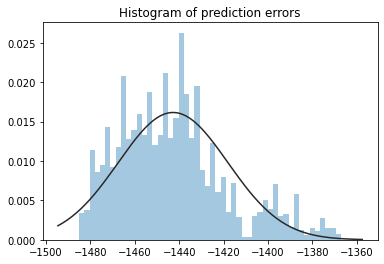

Excess kurtosis of normal distribution (should be 0): [0.23294088]
Skewness of normal distribution (should be 0): [0.74892347]


In [39]:
logging.disable(logging.INFO)
xgb_params_logerror = {
    'max_depth': 10,
    'n_estimators': 2000,
}
for objective in ['reg:squaredlogerror']:
    predictor = AgePredictor(
        model=XGBRegressor(objective=objective),
        hyperparameters=xgb_params_logerror,
        df=data_netherlands_sample,
        test_training_split=split_80_20,
        preprocessing_stages=[remove_outliers]
    )
    predictor.print_model_error()
    visualizations.plot_prediction_error_histogram(predictor.y_test, predictor.y_predict)

In [38]:
predictor.model.get_params()

{'objective': 'reg:squaredlogerror',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'enable_categorical': False,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 5,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 1000,
 'n_jobs': 16,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

MAE: 12.956551434676435 y
RMSE: 18.5646870114495 y
R2: 0.4344671656859519


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


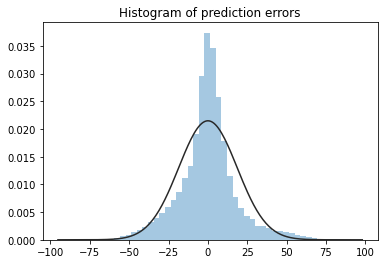

Excess kurtosis of normal distribution (should be 0): [2.06009062]
Skewness of normal distribution (should be 0): [0.27779514]
MAE: 13.112403970502465 y
RMSE: 18.70736881101643 y
R2: 0.42574077832123136


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


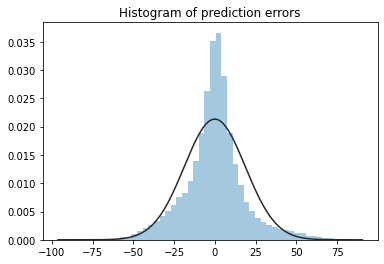

Excess kurtosis of normal distribution (should be 0): [1.91205966]
Skewness of normal distribution (should be 0): [0.26515016]
MAE: 12.993200383368492 y
RMSE: 18.62995390704417 y
R2: 0.43048374762878483


`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


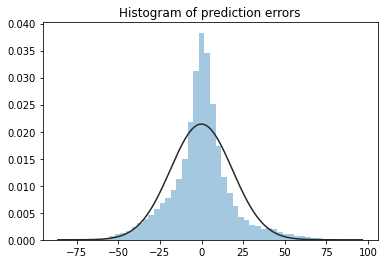

Excess kurtosis of normal distribution (should be 0): [1.96605269]
Skewness of normal distribution (should be 0): [0.25752291]


In [22]:
logging.disable(logging.INFO)
for objective in ['reg:squarederror', 'reg:gamma', 'reg:tweedie']:
    predictor = AgePredictor(
        model=XGBRegressor(objective=objective),
        df=data_netherlands_sample,
        test_training_split=split_80_20,
        preprocessing_stages=[remove_outliers]
    )
    predictor.print_model_error()
    visualizations.plot_prediction_error_histogram(predictor.y_test, predictor.y_predict)